In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
device

device(type='cuda')

In [2]:
batch_size = 64
num_classes = 10

In [3]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            # %%%%%%%%%%%%%%%%%%%%%% Layer-1 %%%%%%%%%%%%%%%%%%%%%%%%%
            nn.BatchNorm2d(6),
            nn.ReLU(),
            # %%%%%%%%%%%%%%%%%%%%%% Layer-2 %%%%%%%%%%%%%%%%%%%%%%%%%
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            # %%%%%%%%%%%%%%%%%%%%%% Layer-3 %%%%%%%%%%%%%%%%%%%%%%%%%
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # %%%%%%%%%%%%%%%%%%%%%% Layer-4 %%%%%%%%%%%%%%%%%%%%%%%%%
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        # %%%%%%%%%%%%%%%%%%%%%% Layer-5 %%%%%%%%%%%%%%%%%%%%%%%%%
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        # %%%%%%%%%%%%%%%%%%%%%% Layer-6 %%%%%%%%%%%%%%%%%%%%%%%%%
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        # %%%%%%%%%%%%%%%%%%%%%% Layer-7 %%%%%%%%%%%%%%%%%%%%%%%%%
        self.fc2 = nn.Linear(84, num_classes)
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        # inside forward method image dimension are : [batch_size, channels, height, width]
        output = output.reshape(output.size(0), -1)
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output

In [4]:
''' Keeping num_classes at 10, as this will be the output shape from the final Layer of the LeNet5 Neural Network model, because, the output layer will have 10 output neurons, since the MNIST data has 10 classes for each of the 10 numerical digits. '''

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)

In [6]:
train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [7]:
test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [8]:
learning_rate = 0.001

model = LeNet5(num_classes).to(device)

#Setting the loss function
criterion = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_dataloader)

In [9]:
print('Length of train_dataloader ', len(train_dataloader))
print('Length of test_dataloader ', len(test_dataloader))

Length of train_dataloader  938
Length of test_dataloader  157


In [10]:
def train(model, criterion, optimizer, num_epochs=10):
    total_training_loss = []
    total_step = len(train_dataloader)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels) in enumerate(train_dataloader):  
            images = images.to(device)
            labels = labels.to(device)
            
            #Forward Propagation
            outputs = model(images)
            loss = criterion(outputs, labels)
                
            # Backward Propagation and optimize
            optimizer.zero_grad() # Clear the past gradient by set the gradients to zero before every update
            loss.backward() #  calculate the new gradients
            running_loss += loss.item() * images.size(0)
            optimizer.step() # we update the weights 
            
                
            if (i+1) % 400 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        epoch_loss = running_loss / len(train_dataloader)
        total_training_loss.append(epoch_loss)
    return total_training_loss

In [12]:
total_training_loss = train(model, criterion, optimizer, num_epochs=100)

Streaming output truncated to the last 5000 lines.
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output after layer2 torch.Size([64, 16, 5, 5])
output af

In [13]:
total_training_loss

[1.42216855334118,
 1.2081513774009354,
 1.0343996344535336,
 0.9982387208472143,
 0.8908406127090834,
 0.7742344913898713,
 0.7094594348992245,
 0.6677792844230256,
 0.6103179821847293,
 0.4819788051581607,
 0.6319913096776639,
 0.3917369910537859,
 0.43304212531920383,
 0.5508320660367417,
 0.48740203958543044,
 0.3012240812830351,
 0.35890550546516325,
 0.3788762787697042,
 0.31201717336210355,
 0.2742657154828263,
 0.20250318994351127,
 0.49774364243303876,
 0.19643791207447941,
 0.3611131660670044,
 0.2842513782863931,
 0.19402949878256526,
 0.20917516650024748,
 0.2994884249512692,
 0.29526812026145244,
 0.12368513209294475,
 0.25918897473137015,
 0.2923685101922243,
 0.1644882240374379,
 0.1289487025135339,
 0.26042359558529216,
 0.1364779407043995,
 0.2377034198518788,
 0.2556227948833194,
 0.21819668177976498,
 0.12133387417727529,
 0.19533243931315608,
 0.16002033248163355,
 0.2874692016716838,
 0.1705880936304492,
 0.1357982810903845,
 0.1896892930523905,
 0.1243085154899958

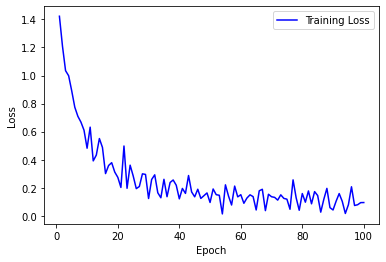

In [16]:
epoch_count = range(1, len(total_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, total_training_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();